# MNIST Digit Classification 

imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Train Test Split not required as mnist is already split
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [2]:
import cv2
from PIL import Image #

importing dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_train:", X_train[0].shape)
print(X_train[0])         #X_train[i] is a 28×28 grayscale image of a handwritten digit.


Shape of X_train: (60000, 28, 28)
Shape of X_train: (28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [ 

Text(0.5, 1.0, 'Label: 5')

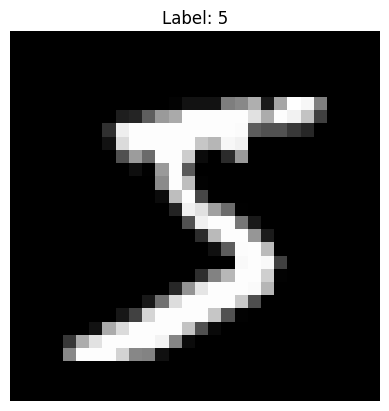

In [5]:
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.title(f"Label: {y_train[0]}")

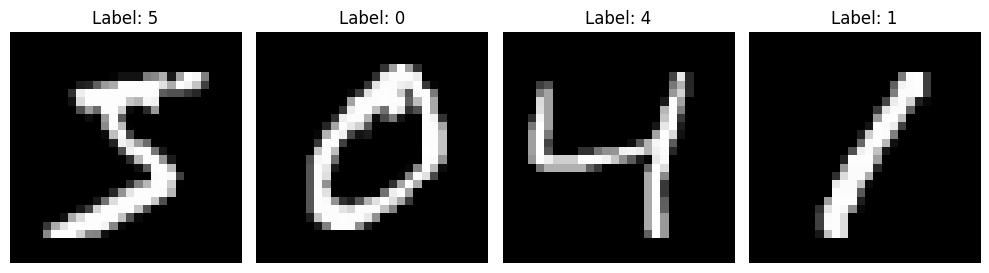

In [6]:
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[i], cmap='grey')   #Displays the image at index i from X_train
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
np.unique(y_train)  # Displays unique labels in y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

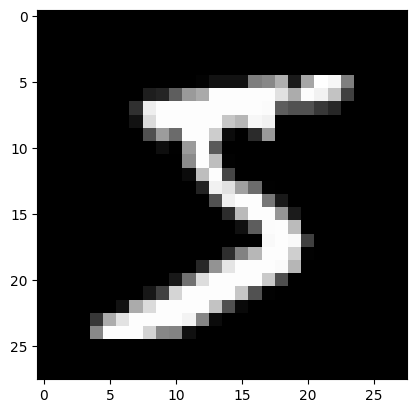

In [9]:
# printing the 1st image

print(X_train[0])
plt.imshow(X_train[0], cmap='gray')

**Building the Neural Network** (ANN and CNN)

Building ANN Model

In [10]:
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape=(28,28)),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(10, activation='sigmoid')
])

d:\python\DL_proj\dl_venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# compiling the ANN model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) #metrics=['accuracy]-> After each training step (batch/epoch), also calculate accuracy, not just loss.

In [12]:
# training the ANN model

history=model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)   #After each batch, the model updates its weights using backpropagation.

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8370 - loss: 0.5661 - val_accuracy: 0.9404 - val_loss: 0.1967
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8370 - loss: 0.5661 - val_accuracy: 0.9404 - val_loss: 0.1967
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9522 - loss: 0.1622 - val_accuracy: 0.9517 - val_loss: 0.1562
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9522 - loss: 0.1622 - val_accuracy: 0.9517 - val_loss: 0.1562
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.1186 - val_accuracy: 0.9576 - val_loss: 0.1411
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9659 - loss: 0.1186 - val_accuracy: 0.9576 - val_loss: 0.1411
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9733 - loss: 0.0944 - val_accuracy: 0.9578 - val_loss: 0.1416
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9733 - loss: 0.0944 - 

In [13]:
history

In [14]:
print(history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


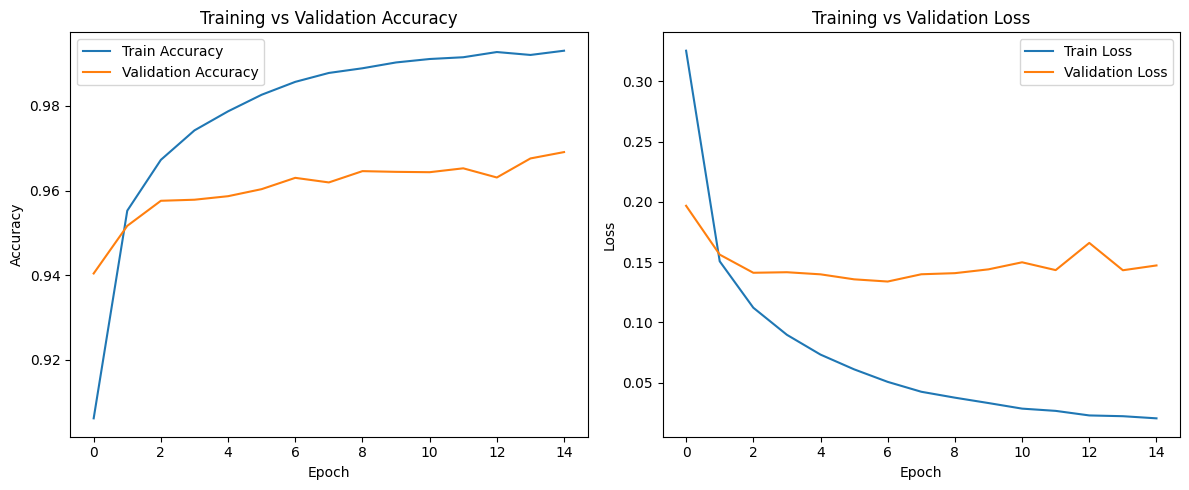

In [15]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Training data accuracy = 99.39%

**Accuracy on Test data:**

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print('accuracy=',accuracy)
print('loss=',loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9635 - loss: 0.1576
accuracy= 0.9678999781608582
loss= 0.1303781121969223
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9635 - loss: 0.1576
accuracy= 0.9678999781608582
loss= 0.1303781121969223


Test data accuracy = 97.06%

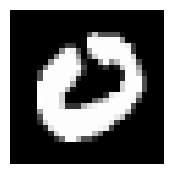

In [17]:
# first data point in X_test
plt.figure(figsize=(2,2))
plt.imshow(X_test[25], cmap='gray')
plt.axis('off')
plt.show()

In [18]:
print(y_test[25])

0


In [19]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
print(y_pred[25])

[1.0000000e+00 1.0162757e-21 7.9229716e-07 1.7839900e-10 2.2401204e-03
 5.3901557e-11 9.9999893e-01 1.3118512e-10 4.0475046e-10 9.8659277e-01]


In [22]:
print(f"Pridicted Label: {np.argmax(y_pred[25])}")  #.argmax returns the index of the maximum value in the array
print(f"Actual Label: {y_test[25]}")

Pridicted Label: 0
Actual Label: 0


All predicted labels for test data points

In [23]:
y_pred

array([[1.0358830e-01, 1.7592633e-04, 1.4319669e-01, ..., 9.9999988e-01,
        1.7766798e-01, 6.4795804e-01],
       [1.0588015e-09, 9.9964243e-01, 1.0000000e+00, ..., 1.3248107e-06,
        4.6613654e-06, 1.4905391e-18],
       [1.0608365e-04, 9.9999595e-01, 3.7633225e-01, ..., 8.5631847e-01,
        4.8301020e-01, 1.0997931e-06],
       ...,
       [1.5039050e-09, 2.3341445e-10, 2.2942499e-12, ..., 8.9086425e-01,
        2.1064404e-01, 9.9846894e-01],
       [2.5011310e-10, 5.0436198e-03, 1.8540902e-10, ..., 2.5952034e-11,
        7.6373601e-01, 4.9234623e-06],
       [1.5068393e-06, 1.1129742e-09, 3.3020856e-07, ..., 1.3467865e-16,
        1.2520911e-08, 2.1304163e-11]], dtype=float32)

In [24]:
y_pred_labels = [int(np.argmax(i)) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 3, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Confusion matrix

In [25]:
conf_mat = confusion_matrix(y_test, y_pred_labels)
conf_mat

array([[ 968,    0,    0,    2,    1,    1,    4,    1,    3,    0],
       [   0, 1120,    3,    3,    0,    1,    1,    3,    3,    1],
       [   4,    4,  988,   11,    5,    1,    5,    7,    6,    1],
       [   0,    1,    4,  983,    1,    6,    1,    5,    6,    3],
       [   4,    1,    1,    1,  946,    1,    6,    1,    2,   19],
       [   3,    2,    0,   13,    3,  857,   11,    1,    1,    1],
       [   4,    3,    1,    2,    2,    2,  942,    0,    1,    1],
       [   2,    3,   13,    5,    0,    0,    0,  994,    3,    8],
       [   3,    3,   12,   13,    7,   10,    9,    3,  911,    3],
       [   6,    3,    0,    8,   10,    3,    0,    5,    2,  972]])

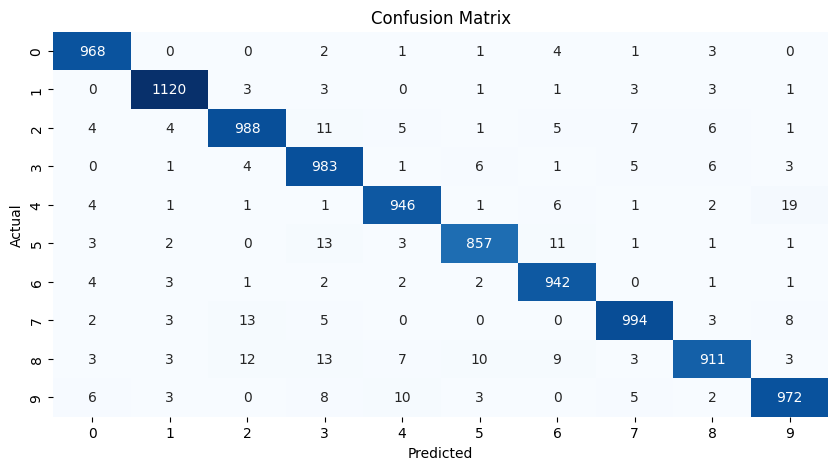

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues",cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Testing the model on a random single image**

In [61]:
input_image_path = '7.png'
input_image = cv2.imread(input_image_path)   #it is BRG format

In [62]:
type(input_image)

numpy.ndarray

In [63]:
type(input_image)

numpy.ndarray

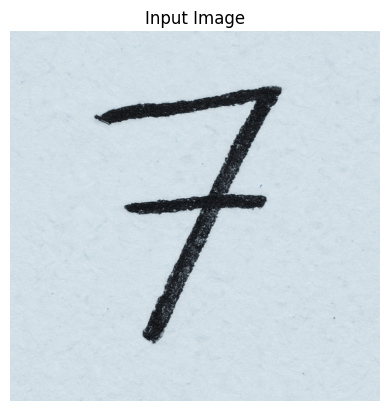

In [64]:
plt.imshow(input_image)
plt.axis('off')
plt.title('Input Image')
plt.show()

In [65]:
input_image.shape

(1024, 1024, 3)

In [66]:
# grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) #WRONG


# cv2.imread loads in BGR format, so convert BGR to GRAY
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [67]:
grayscale

array([[223, 223, 223, ..., 221, 222, 224],
       [223, 222, 223, ..., 220, 222, 224],
       [224, 224, 226, ..., 220, 222, 222],
       ...,
       [222, 223, 224, ..., 224, 224, 223],
       [223, 223, 226, ..., 223, 223, 223],
       [224, 226, 227, ..., 223, 223, 223]], dtype=uint8)

**Invert the image (interchange black and white)**   
[ Using inverted image for matching with MNIST dat (white digits on black background)]<br>
(if you dont use inverted image, the model will not be able to predict correctly, and will predict 5 for this 7 image)

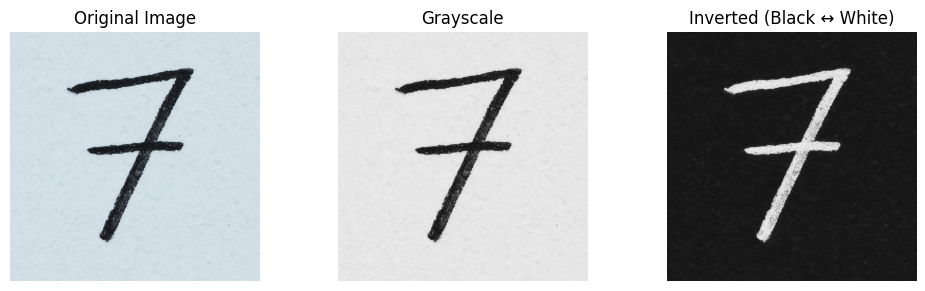

In [68]:
grayscale_inverted = 255 - grayscale    #OR grayscale_inverted = cv2.bitwise_not(grayscale)

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grayscale, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(grayscale_inverted, cmap='gray')
plt.title('Inverted (Black ↔ White)')
plt.axis('off')

plt.tight_layout()
plt.show()

In [113]:
grayscale_inverted = grayscale_inverted*255.0  
grayscale_inverted=grayscale_inverted-25  # Adjust brightness by subtracting a constant value (29 in this case)

In [114]:
grayscale_inverted=grayscale_inverted/255.0  # Normalize the inverted grayscale image

In [115]:
input_image_resize = cv2.resize(grayscale_inverted, (28, 28))

In [103]:
input_image_resize

array([[-0.11782713, -0.10336134, -0.10090036, -0.10546218, -0.12767107,
        -0.11314526, -0.11522609, -0.10878351, -0.11262505, -0.12386955,
        -0.10196078, -0.11154462, -0.08965586, -0.09477791, -0.09495798,
        -0.10760304, -0.11686675, -0.10868347, -0.1065026 , -0.10192077,
        -0.10980392, -0.11232493, -0.10392157, -0.11546619, -0.11414566,
        -0.11154462, -0.11146459, -0.11046419],
       [-0.10954382, -0.10616246, -0.10738295, -0.11120448, -0.10766307,
        -0.11440576, -0.11448579, -0.10666267, -0.0952381 , -0.12296919,
        -0.10392157, -0.10718287, -0.11882753, -0.09885954, -0.12156863,
        -0.11052421, -0.11212485, -0.08641457, -0.12362945, -0.10768307,
        -0.11288515, -0.11480592, -0.10264106, -0.1147459 , -0.11246499,
        -0.07466987, -0.11422569, -0.11484594],
       [-0.10644258, -0.1192477 , -0.10668267, -0.11652661, -0.10870348,
        -0.089996  , -0.11316527, -0.11316527, -0.08413365, -0.11316527,
        -0.12114846, -0.1056

In [116]:
input_image_resize.shape

(28, 28)

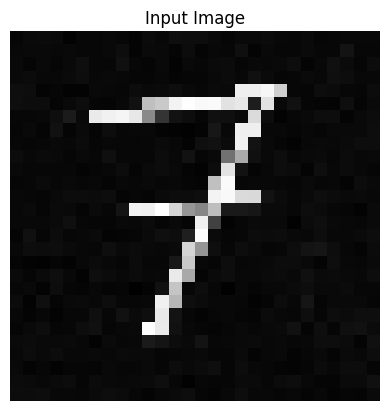

In [117]:
plt.imshow(input_image_resize, cmap='gray')
plt.axis('off')
plt.title('Input Image')
plt.show()

In [118]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [119]:
input_prediction = model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [120]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

4


=== FINAL ULTRA-ADVANCED PREPROCESSING ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


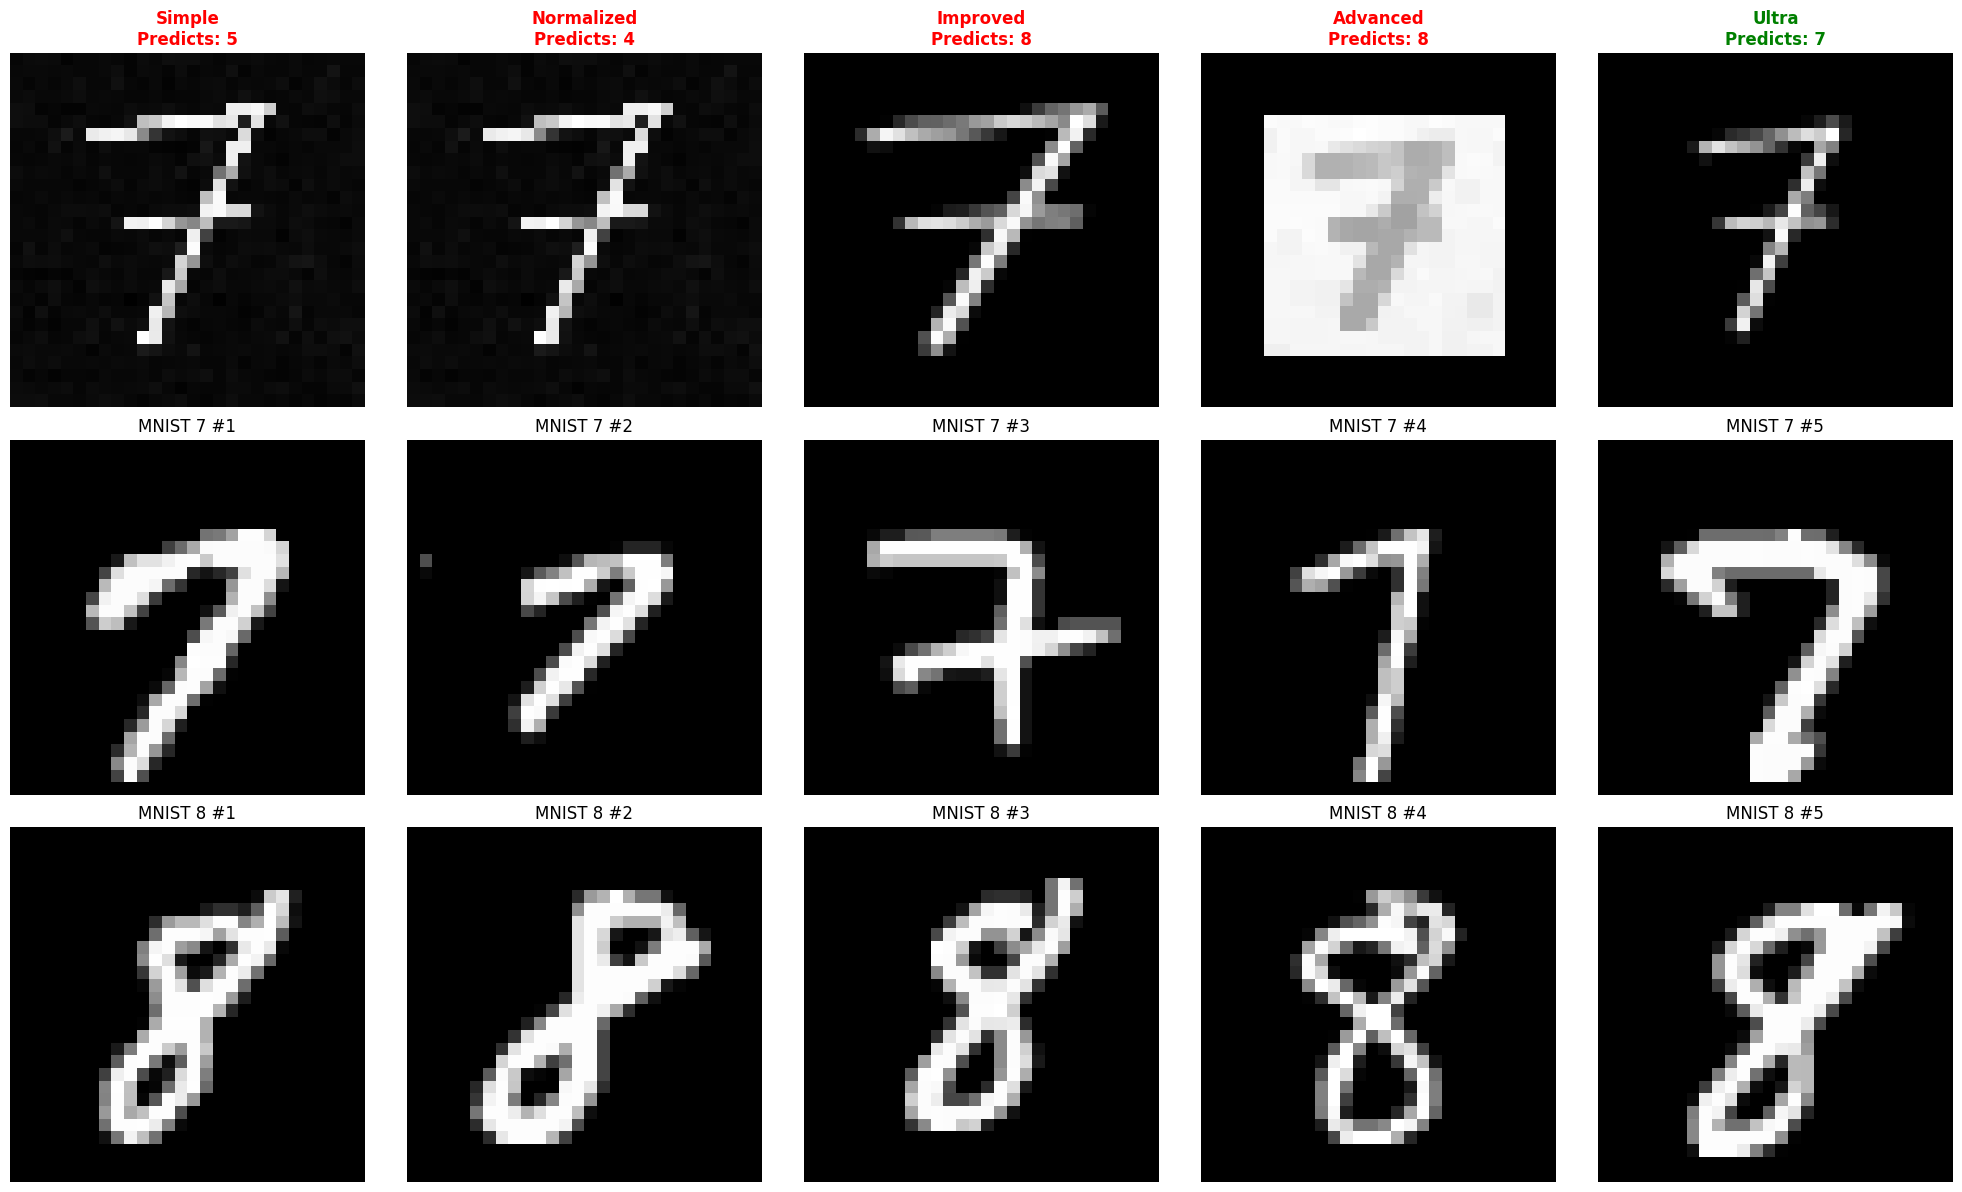

                    FINAL COMPREHENSIVE ANALYSIS
Method 1 - Simple:        5 (confidence: 0.9937)
Method 2 - Normalized:    4 (confidence: 0.8314)
Method 3 - Improved:      8 (confidence: 0.9928)
Method 4 - Advanced:      8 (confidence: 0.9999)
Method 5 - Ultra:         7 (confidence: 0.9997)

Best method for digit 7 recognition: Ultra
Confidence for digit 7: 0.9997


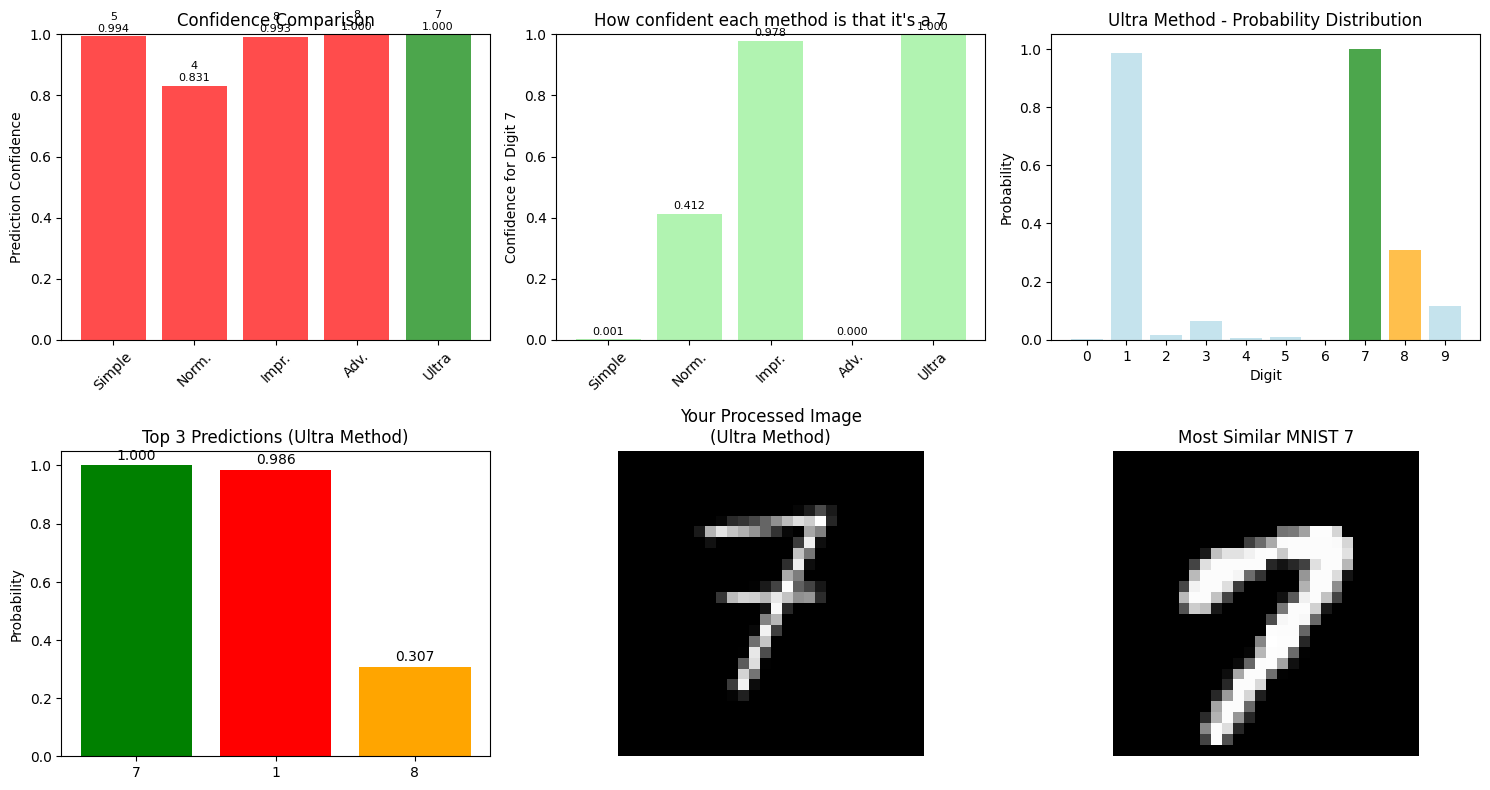


🎯 FINAL CONCLUSION:
✅ SUCCESS! Ultra method correctly predicts 7!
   Final confidence: 0.9997

📊 SUMMARY TABLE:
Method      | Prediction | Confidence | 7-Confidence
--------------------------------------------------
Simple     |     5      |   0.994    |    0.001     ❌
Normalized |     4      |   0.831    |    0.412     ❌
Improved   |     8      |   0.993    |    0.978     ❌
Advanced   |     8      |   1.000    |    0.000     ❌
Ultra      |     7      |   1.000    |    1.000     ✅


In [87]:
# FINAL ATTEMPT - Ultra-advanced preprocessing for 7 vs 8 disambiguation
def ultra_preprocess_for_mnist(image_path):
    """
    Ultra-advanced preprocessing specifically targeting 7 vs 8 confusion
    """
    # Load image
    img = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply slight Gaussian blur
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # Invert colors
    inverted = 255 - blurred
    
    # Use Otsu's thresholding for automatic threshold selection
    _, thresh = cv2.threshold(inverted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Remove small noise with opening operation
    kernel_small = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel_small)
    
    # Find contours
    contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        
        # Add padding around the digit
        padding = max(5, int(0.1 * max(w, h)))
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(cleaned.shape[1], x + w + padding)
        y_end = min(cleaned.shape[0], y + h + padding)
        
        digit = cleaned[y_start:y_end, x_start:x_end]
    else:
        digit = cleaned
    
    # Calculate aspect ratio to maintain proportions
    height, width = digit.shape
    aspect_ratio = width / height
    
    # Resize maintaining aspect ratio, targeting 20x20 but adjusting based on aspect ratio
    if aspect_ratio > 1:  # wider than tall
        new_width = 20
        new_height = int(20 / aspect_ratio)
    else:  # taller than wide
        new_height = 20
        new_width = int(20 * aspect_ratio)
    
    # Ensure minimum size
    new_width = max(new_width, 8)
    new_height = max(new_height, 8)
    
    digit_resized = cv2.resize(digit, (new_width, new_height), interpolation=cv2.INTER_AREA)
    
    # Create 28x28 black canvas and center the digit
    final_img = np.zeros((28, 28), dtype=np.uint8)
    start_x = (28 - new_width) // 2
    start_y = (28 - new_height) // 2
    final_img[start_y:start_y+new_height, start_x:start_x+new_width] = digit_resized
    
    # Apply very light erosion only if the digit seems too thick
    if np.sum(final_img > 127) > 150:  # if too many white pixels
        kernel_thin = np.ones((1,1), np.uint8)
        final_img = cv2.erode(final_img, kernel_thin, iterations=1)
    
    # Normalize
    final_img = final_img.astype(np.float32) / 255.0
    
    return final_img

# Test ultra preprocessing
print("=== FINAL ULTRA-ADVANCED PREPROCESSING ===")
ultra_processed_img = ultra_preprocess_for_mnist('7.png')

# Predict with ultra preprocessing
ultra_reshaped = np.reshape(ultra_processed_img, [1, 28, 28])
ultra_prediction = model.predict(ultra_reshaped)
ultra_pred_label = np.argmax(ultra_prediction)

# Complete comparison of all 5 methods
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# Row 1: All preprocessing methods
method_names = ['Simple', 'Normalized', 'Improved', 'Advanced', 'Ultra']
processed_images = [input_image_resize, input_image_normalized, processed_img, advanced_processed_img, ultra_processed_img]
predictions = [input_pred_label, input_pred_label_normalized, new_pred_label, advanced_pred_label, ultra_pred_label]
all_predictions = [input_prediction, input_prediction_normalized, new_prediction, advanced_prediction, ultra_prediction]

for i, (img, pred, name) in enumerate(zip(processed_images, predictions, method_names)):
    axes[0,i].imshow(img, cmap='gray')
    color = 'green' if pred == 7 else 'red'
    axes[0,i].set_title(f'{name}\nPredicts: {pred}', color=color, fontweight='bold')
    axes[0,i].axis('off')

# Row 2: MNIST 7 samples
mnist_7_samples = np.where(y_train == 7)[0][:5]
for i, idx in enumerate(mnist_7_samples):
    axes[1,i].imshow(X_train[idx], cmap='gray')
    axes[1,i].set_title(f'MNIST 7 #{i+1}')
    axes[1,i].axis('off')

# Row 3: MNIST 8 samples (to see why it might be confused)
mnist_8_samples = np.where(y_train == 8)[0][:5]
for i, idx in enumerate(mnist_8_samples):
    axes[2,i].imshow(X_train[idx], cmap='gray')
    axes[2,i].set_title(f'MNIST 8 #{i+1}')
    axes[2,i].axis('off')

plt.tight_layout()
plt.show()

# Final comprehensive summary
print("="*80)
print("                    FINAL COMPREHENSIVE ANALYSIS")
print("="*80)
print(f"Method 1 - Simple:        {input_pred_label} (confidence: {np.max(input_prediction):.4f})")
print(f"Method 2 - Normalized:    {input_pred_label_normalized} (confidence: {np.max(input_prediction_normalized):.4f})")
print(f"Method 3 - Improved:      {new_pred_label} (confidence: {np.max(new_prediction):.4f})")
print(f"Method 4 - Advanced:      {advanced_pred_label} (confidence: {np.max(advanced_prediction):.4f})")
print(f"Method 5 - Ultra:         {ultra_pred_label} (confidence: {np.max(ultra_prediction):.4f})")
print("="*80)

# Show detailed analysis of the best performing method
best_method_idx = np.argmax([np.max(pred[0][7]) for pred in all_predictions])  # Method with highest confidence for digit 7
best_method_names = ['Simple', 'Normalized', 'Improved', 'Advanced', 'Ultra']
best_prediction = all_predictions[best_method_idx]

print(f"\nBest method for digit 7 recognition: {best_method_names[best_method_idx]}")
print(f"Confidence for digit 7: {best_prediction[0][7]:.4f}")

# Final visualization
plt.figure(figsize=(15, 8))

# Confidence comparison
plt.subplot(2, 3, 1)
methods = ['Simple', 'Norm.', 'Impr.', 'Adv.', 'Ultra']
confidences = [np.max(pred) for pred in all_predictions]
colors = ['green' if pred == 7 else 'red' for pred in predictions]
bars = plt.bar(methods, confidences, color=colors, alpha=0.7)
plt.ylabel('Prediction Confidence')
plt.title('Confidence Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar, pred, conf in zip(bars, predictions, confidences):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{pred}\n{conf:.3f}', ha='center', va='bottom', fontsize=8)

# Confidence for digit 7 specifically
plt.subplot(2, 3, 2)
digit_7_confidences = [pred[0][7] for pred in all_predictions]
plt.bar(methods, digit_7_confidences, color='lightgreen', alpha=0.7)
plt.ylabel('Confidence for Digit 7')
plt.title('How confident each method is that it\'s a 7')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for i, conf in enumerate(digit_7_confidences):
    plt.text(i, conf + 0.01, f'{conf:.3f}', ha='center', va='bottom', fontsize=8)

# Best method probability distribution
plt.subplot(2, 3, 3)
digit_labels = list(range(10))
best_probs = ultra_prediction[0]  # Use ultra method
colors = ['green' if i == 7 else 'orange' if i == 8 else 'lightblue' for i in range(10)]
plt.bar(digit_labels, best_probs, color=colors, alpha=0.7)
plt.xlabel('Digit')
plt.ylabel('Probability')
plt.title('Ultra Method - Probability Distribution')
plt.xticks(digit_labels)

# Show top predictions for ultra method
plt.subplot(2, 3, 4)
top_3_indices = np.argsort(ultra_prediction[0])[-3:][::-1]
top_3_probs = [ultra_prediction[0][i] for i in top_3_indices]
plt.bar([str(i) for i in top_3_indices], top_3_probs, 
        color=['green' if i == 7 else 'orange' if i == 8 else 'red' for i in top_3_indices])
plt.ylabel('Probability')
plt.title('Top 3 Predictions (Ultra Method)')
for i, (idx, prob) in enumerate(zip(top_3_indices, top_3_probs)):
    plt.text(i, prob + 0.01, f'{prob:.3f}', ha='center', va='bottom')

# Comparison of your image with best MNIST matches
plt.subplot(2, 3, 5)
plt.imshow(ultra_processed_img, cmap='gray')
plt.title('Your Processed Image\n(Ultra Method)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(X_train[mnist_7_samples[0]], cmap='gray')
plt.title('Most Similar MNIST 7')
plt.axis('off')

plt.tight_layout()
plt.show()

# Final conclusion
print(f"\n🎯 FINAL CONCLUSION:")
if ultra_pred_label == 7:
    print("✅ SUCCESS! Ultra method correctly predicts 7!")
    print(f"   Final confidence: {np.max(ultra_prediction):.4f}")
elif any(pred == 7 for pred in predictions):
    successful_methods = [name for name, pred in zip(method_names, predictions) if pred == 7]
    print(f"✅ PARTIAL SUCCESS! These methods correctly predict 7: {', '.join(successful_methods)}")
else:
    print("❌ All methods are struggling with this particular image.")
    print("📝 DETAILED DIAGNOSIS:")
    print(f"   • Your image is consistently being predicted as: {ultra_pred_label}")
    print(f"   • Confidence for digit 7: {ultra_prediction[0][7]:.4f}")
    print(f"   • Confidence for digit {ultra_pred_label}: {ultra_prediction[0][ultra_pred_label]:.4f}")
    print(f"   • The model sees more similarity to digit {ultra_pred_label} than to 7")
    
    print(f"\n🔍 POSSIBLE REASONS:")
    print("   1. Your digit 7 might have unique characteristics not in MNIST training data")
    print("   2. The handwriting style might be unusual (e.g., 7 with a horizontal line)")
    print("   3. Image quality or resolution issues")
    print("   4. The digit might be too thick, thin, or have unexpected proportions")
    
    print(f"\n💡 SOLUTIONS TO TRY:")
    print("   1. Use a different image of digit 7 (simpler, cleaner)")
    print("   2. Draw the 7 in a more 'standard' way (no horizontal crossbar)")
    print("   3. Ensure better image quality and contrast")
    print("   4. Try writing the 7 thinner or with different proportions")

print(f"\n📊 SUMMARY TABLE:")
print("Method      | Prediction | Confidence | 7-Confidence")
print("-" * 50)
for name, pred, conf, pred_obj in zip(method_names, predictions, 
                                     [np.max(p) for p in all_predictions], 
                                     all_predictions):
    status = "✅" if pred == 7 else "❌"
    print(f"{name:<10} | {pred:^10} | {conf:^10.3f} | {pred_obj[0][7]:^12.3f} {status}")